## 8.1 a)


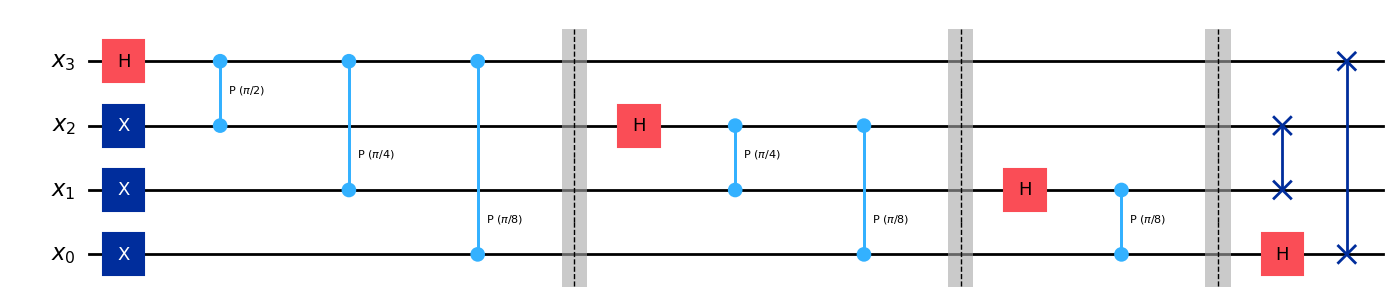

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator, Aer
from qiskit.circuit.library import XGate, ZGate
import numpy as np
import math

qx = QuantumRegister(4, "x")


qc = QuantumCircuit(qx)


qc.x(range(3))



qc.h(3)


qc.cp((2 * math.pi) / 4, 3, 2)


qc.cp((2 * math.pi) / 8, 3, 1)


qc.cp((2 * math.pi) / 16, 3, 0)



qc.barrier()
qc.h(2)



qc.cp((2 * math.pi) / 8, 2, 1)


qc.cp((2 * math.pi) / 16, 2, 0)



qc.barrier()


qc.h(1)



qc.cp((2 * math.pi) / 16, 1, 0)



qc.barrier()


qc.h(0)



qc.swap(3, 0)


qc.swap(2, 1)



qc.draw(output="mpl", reverse_bits=True)

In [11]:
def showstatevector(statevector):
    statevector = np.asarray(statevector)
    num_qubits = int(np.log2(len(statevector)))
    basis_states = [f"|{i:0{num_qubits}b})" for i in range(len(statevector))]
    print(f"{basis_states=}")
    output = ""
    for i, amplitude in enumerate(statevector):
        if np.abs(amplitude) > 1e-10:
            if output != "":
                output += " + "
            if np.abs(amplitude.real - 1) < 1e-3 and np.abs(amplitude.imag) < 1e-3:
                output += f"{basis_states [i]}"
            elif np.abs(amplitude.real) < 1e-3 and np.abs(amplitude.imag - 1) < 1e-3:
                output += f"i{basis_states[i]}"
            elif np.abs(amplitude.imag) < 1e-3:
                output += f"({amplitude.real: .3f}){basis_states[i]}"
            else:
                amplitude_str = f"({amplitude.real:.3f} {amplitude.imag:+.3f}i)"
                output += f"{amplitude_str}{basis_states [i]}"
    return output


backend = Aer.get_backend("statevector_simulator")
job = backend.run(qc)
statevector = job.result().get_statevector()

showstatevector(statevector)

basis_states=['|000000)', '|000001)', '|000010)', '|000011)', '|000100)', '|000101)', '|000110)', '|000111)', '|001000)', '|001001)', '|001010)', '|001011)', '|001100)', '|001101)', '|001110)', '|001111)', '|010000)', '|010001)', '|010010)', '|010011)', '|010100)', '|010101)', '|010110)', '|010111)', '|011000)', '|011001)', '|011010)', '|011011)', '|011100)', '|011101)', '|011110)', '|011111)', '|100000)', '|100001)', '|100010)', '|100011)', '|100100)', '|100101)', '|100110)', '|100111)', '|101000)', '|101001)', '|101010)', '|101011)', '|101100)', '|101101)', '|101110)', '|101111)', '|110000)', '|110001)', '|110010)', '|110011)', '|110100)', '|110101)', '|110110)', '|110111)', '|111000)', '|111001)', '|111010)', '|111011)', '|111100)', '|111101)', '|111110)', '|111111)']


'|111110)'

## b)


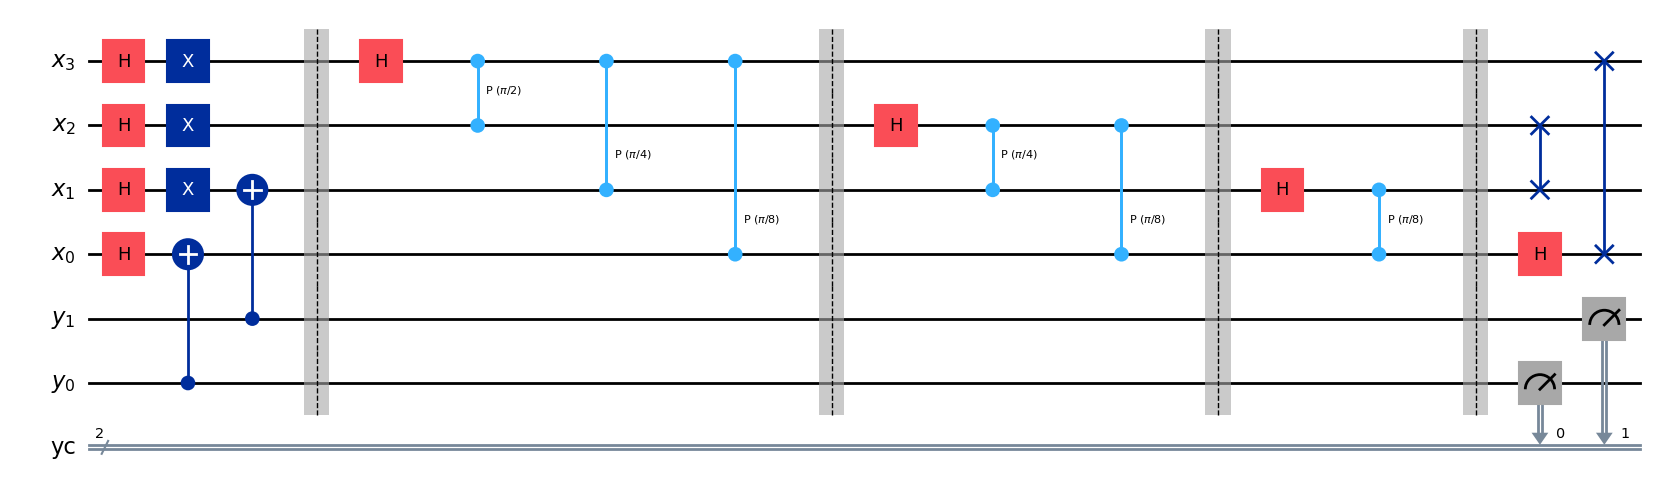

In [18]:
qx = QuantumRegister(4, "x")
qy = QuantumRegister(2, "y")
qyc = ClassicalRegister(2, "yc")
qc = QuantumCircuit(qy, qx, qyc)


qc.x(3)
qc.x(2)
qc.x(1)
qc.x(0)


qc.cx(1, 3)
qc.cx(0, 2)

qc.measure(qy, qyc)

qx = QuantumRegister(4, "x")


qy = QuantumRegister(2, "y")


qyc = ClassicalRegister(2, "yc")


qc = QuantumCircuit(qy, qx, qyc)



qc.h(5)


qc.h(4)


qc.h(3)
qc.h(2)



qc.x(5)


qc.x(4)


qc.x(3)



qc.cx(1, 3)


qc.cx(0, 2)



qc.barrier()



qc.h(5)


qc.cp((2 * math.pi) / 4, 4, 5)


qc.cp((2 * math.pi) / 8, 3, 5)


qc.cp((2 * math.pi) / 16, 2, 5)



qc.barrier()


qc.h(4)


qc.cp((2 * math.pi) / 8, 3, 4)


qc.cp((2 * math.pi) / 16, 2, 4)



qc.barrier()


qc.h(3)


qc.cp((2 * math.pi) / 16, 3, 2)



qc.barrier()
qc.h(2)



qc.swap(5, 2)


qc.swap(4, 3)
qc.measure(qy, qyc)



qc.draw(output="mpl", reverse_bits=True)

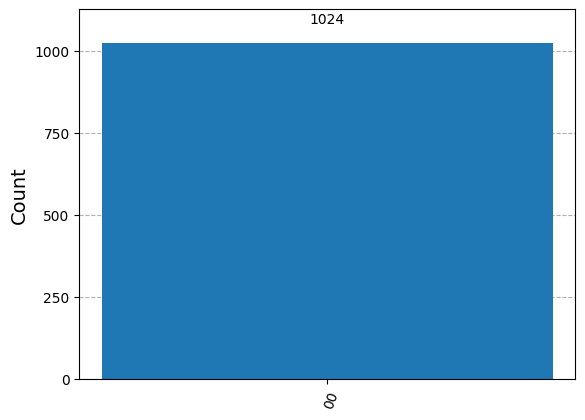

In [19]:
sim = AerSimulator()
result = sim.run(qc).result()
plot_histogram(result.get_counts(0))

## 8.2 a)


f(000) → 101

f(001) → 010

f(010) → 000

f(011) → 110

f(100) → 000

f(101) → 110

f(110) → 101

f(111) → 010

Not bijecttive because the results are repeated.

Vector s = 110


## 8.2 b)


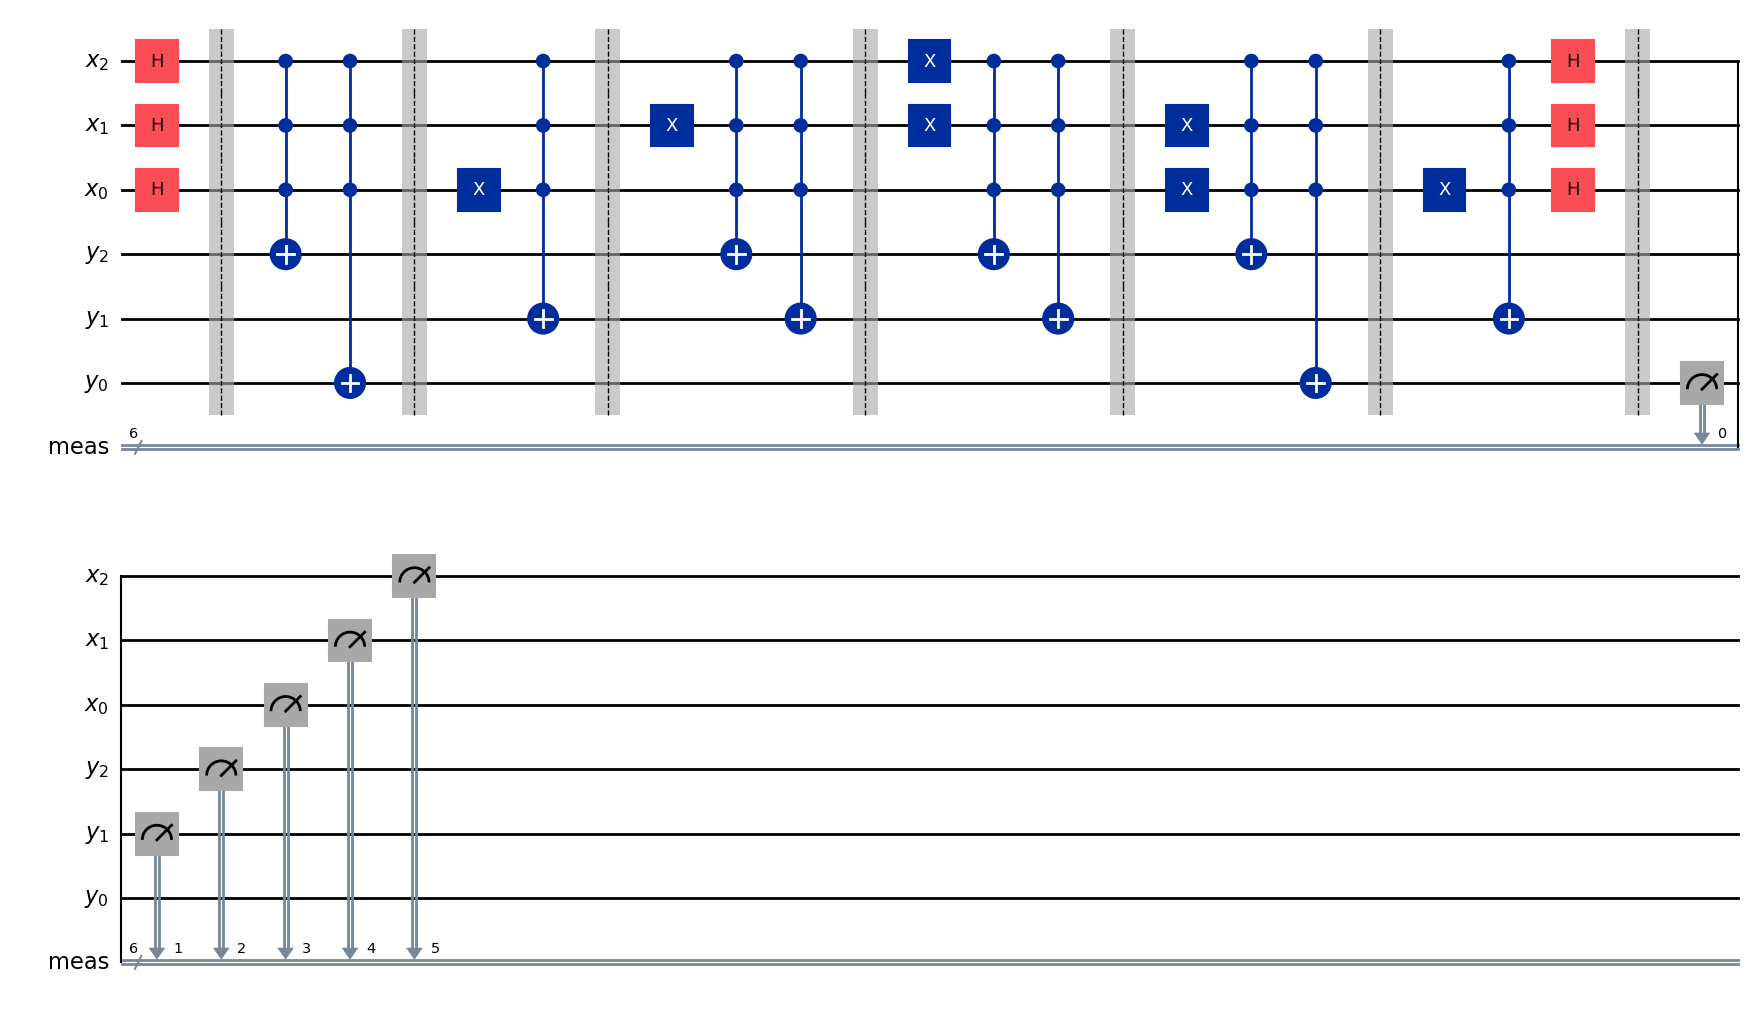

In [9]:
qx = QuantumRegister(3, "x")
qy = QuantumRegister(3, "y")
qc = QuantumCircuit(qy, qx)

qc.h(5)
qc.h(4)
qc.h(3)

qc.barrier()
qc.mcx([5, 4, 3], 2)
qc.mcx([5, 4, 3], 0)

qc.barrier()
qc.x(3)
qc.mcx([5, 4, 3], 1)

qc.barrier()
qc.x(4)
qc.mcx([5, 4, 3], 2)
qc.mcx([5, 4, 3], 1)

qc.barrier()
qc.x(5)
qc.x(4)
qc.mcx([5, 4, 3], 2)
qc.mcx([5, 4, 3], 1)

qc.barrier()
qc.x(4)
qc.x(3)
qc.mcx([5, 4, 3], 2)
qc.mcx([5, 4, 3], 0)

qc.barrier()
qc.x(3)
qc.mcx([5, 4, 3], 1)

qc.h(5)
qc.h(4)
qc.h(3)

qc.measure_all()


qc.draw(output="mpl", reverse_bits=True)

In [10]:
backend = Aer.get_backend("statevector_simulator")
job = backend.run(qc)
statevector = job.result().get_statevector()

showstatevector(statevector)

basis_states=['|000000)', '|000001)', '|000010)', '|000011)', '|000100)', '|000101)', '|000110)', '|000111)', '|001000)', '|001001)', '|001010)', '|001011)', '|001100)', '|001101)', '|001110)', '|001111)', '|010000)', '|010001)', '|010010)', '|010011)', '|010100)', '|010101)', '|010110)', '|010111)', '|011000)', '|011001)', '|011010)', '|011011)', '|011100)', '|011101)', '|011110)', '|011111)', '|100000)', '|100001)', '|100010)', '|100011)', '|100100)', '|100101)', '|100110)', '|100111)', '|101000)', '|101001)', '|101010)', '|101011)', '|101100)', '|101101)', '|101110)', '|101111)', '|110000)', '|110001)', '|110010)', '|110011)', '|110100)', '|110101)', '|110110)', '|110111)', '|111000)', '|111001)', '|111010)', '|111011)', '|111100)', '|111101)', '|111110)', '|111111)']


'|110101)'

First vector: 001

Second vector: 111


**c)**

001 \* 111 = 110
